In [ ]:
# Fonte https://github.com/plotly/datasets
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


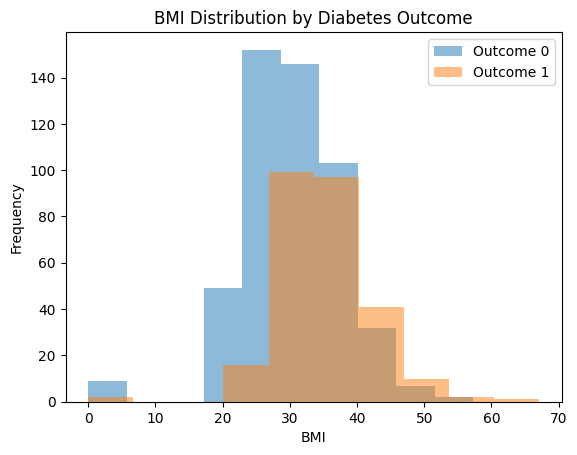

In [ ]:

import matplotlib.pyplot as plt
plt.hist(df['BMI'][df['Outcome'] == 0], alpha=0.5, label='Outcome 0')
plt.hist(df['BMI'][df['Outcome'] == 1], alpha=0.5, label='Outcome 1')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution by Diabetes Outcome')
_ = plt.legend()

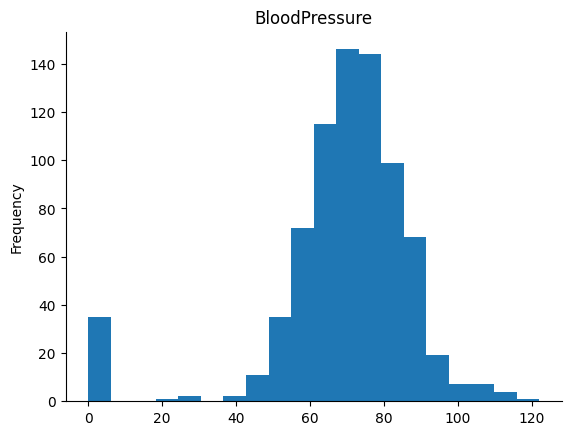

In [ ]:


from matplotlib import pyplot as plt
df['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

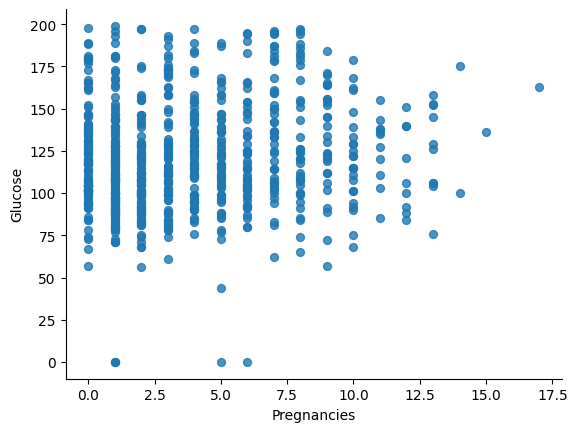

In [ ]:


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

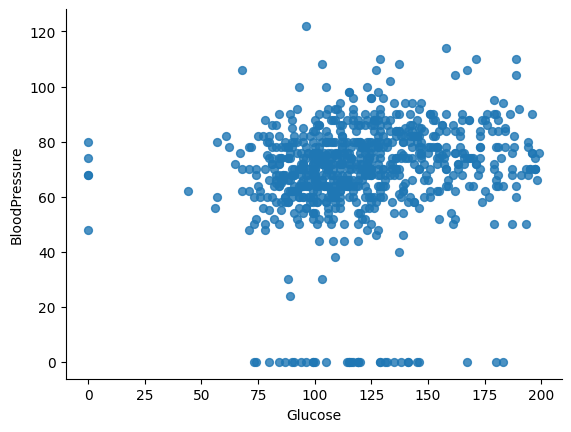

In [ ]:


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print ("Missing values: ",sum(df.isnull().sum()))

Missing values:  0


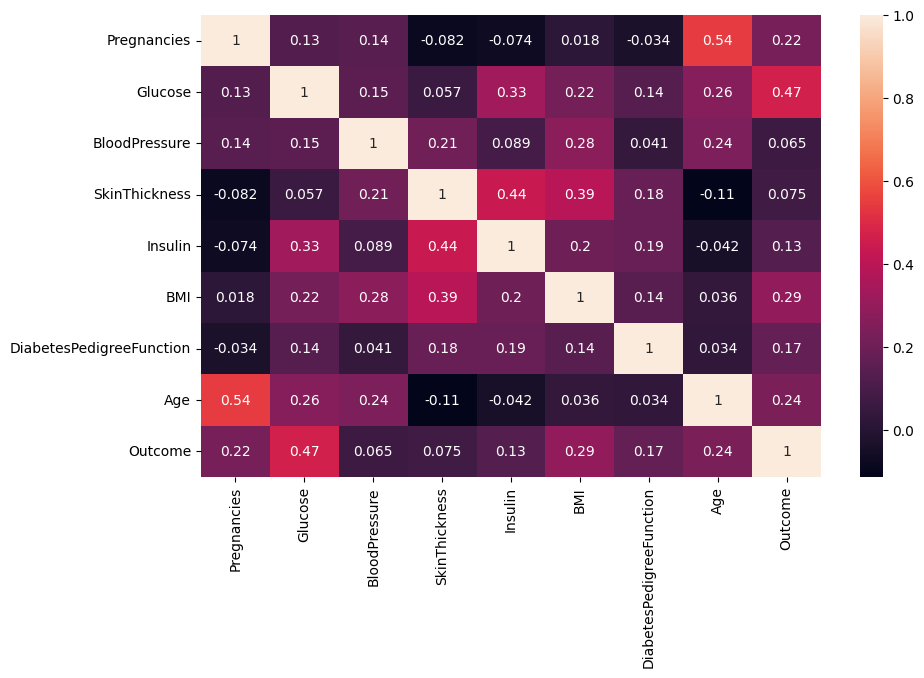

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

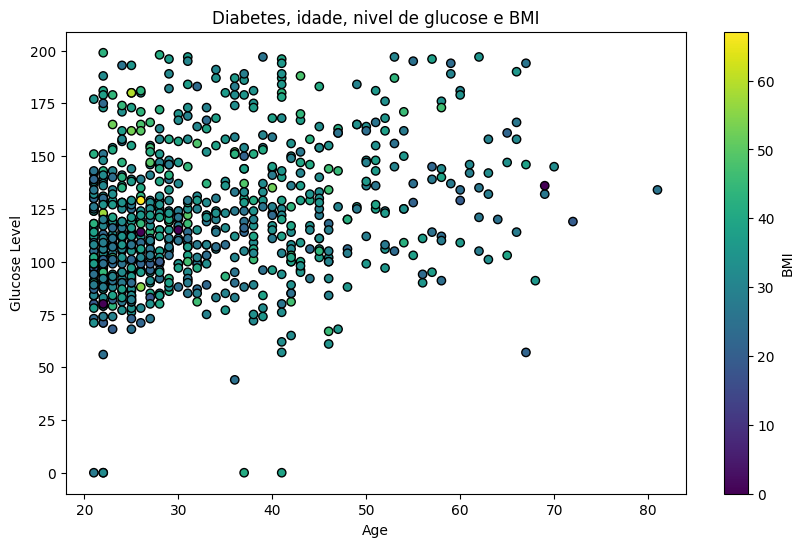

In [ ]:
Outcome = df[df['Outcome'] == 1]
No_Outcome = df[df['Outcome'] == 0]


plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["Glucose"], c=df["BMI"], cmap="viridis", edgecolors="black")
plt.colorbar(label="BMI")


plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.title("Diabetes, idade, nivel de glucose e BMI")


plt.show()

In [ ]:
!pip install imblearn

In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']]

y = df['Outcome']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

X_test.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction
668,6,98,58,33,190,34.0,43,0.430
324,2,112,75,32,0,35.7,21,0.148


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

rf_pipeline = Pipeline(steps = [('scale', preprocessing.StandardScaler()), ('RF',RandomForestClassifier(random_state=42))])

svm_pipeline = Pipeline(steps = [('scale', preprocessing.StandardScaler()),('SVM',SVC(random_state=42))])

logreg_pipeline = Pipeline(steps = [('scale', preprocessing.StandardScaler()),('LR',LogisticRegression(random_state=42))])


In [ ]:
rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [ ]:


print('Média da Floresta Aleatória :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

print('Média da SVM :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

print('Média da Regressão Logística :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Média da Floresta Aleatória : 0.8212855567165912
Média da SVM : 0.7641638001412752
Média da Regressão Logística : 0.728300424036209


In [ ]:
rf_pipeline.fit(X_train_resh,y_train_resh)
svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

rf_pred   =rf_pipeline.predict(X_test)
svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

In [ ]:
print('Mean f1 scores:')

print('Desempenho do RF :',rf_f1)
print('Desempenho do SVM :',svm_f1)
print('Desempenho LR :',logreg_f1)

Mean f1 scores:
Desempenho do RF : 0.6733668341708543
Desempenho do SVM : 0.6536585365853659
Desempenho LR : 0.6682352941176469


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,rf_pred))

print('Score da Acuracia: ',accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       349
           1       0.64      0.71      0.67       189

    accuracy                           0.76       538
   macro avg       0.74      0.75      0.74       538
weighted avg       0.77      0.76      0.76       538

Score da Acuracia:  0.758364312267658


In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X_train_resh,y_train_resh)

rfc_tuned_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_tuned_pred))

print('Score da Acuracia: ',accuracy_score(y_test,rfc_tuned_pred))
print('F1 Score: ',f1_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       349
           1       0.64      0.73      0.68       189

    accuracy                           0.76       538
   macro avg       0.74      0.75      0.75       538
weighted avg       0.77      0.76      0.77       538

Score da Acuracia:  0.7620817843866171
F1 Score:  0.6831683168316831


In [ ]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]

log_param_grid = {'penalty': penalty,
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

In [ ]:
logreg_pipeline = Pipeline(steps = [('scale', preprocessing.StandardScaler()),('LR',LogisticRegression(C=0.1,penalty='l2',random_state=42))])

logreg_pipeline.fit(X_train_resh,y_train_resh)

logreg_tuned_pred   = logreg_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,logreg_tuned_pred))

print('Score da Acuracia: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       349
           1       0.61      0.76      0.68       189

    accuracy                           0.75       538
   macro avg       0.73      0.75      0.73       538
weighted avg       0.77      0.75      0.75       538

Score da Acuracia:  0.7472118959107806
F1 Score:  0.6777251184834123


<ipython-input-23-138816591f78>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision',color='#9bb7d4')


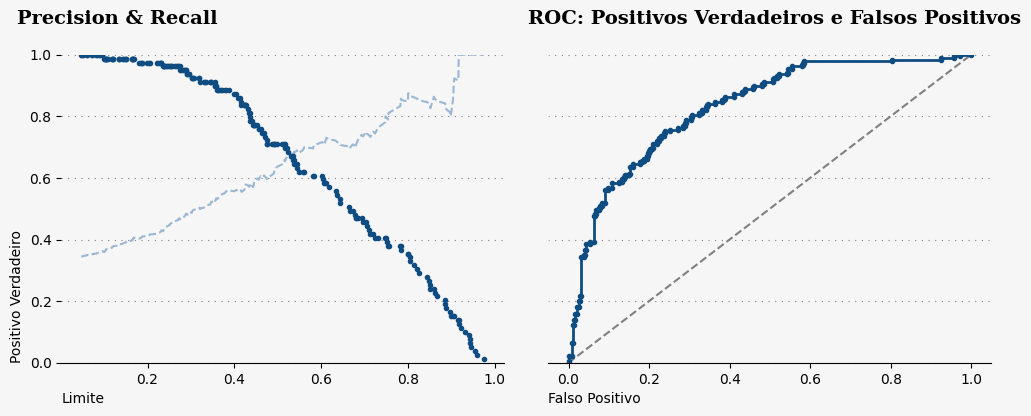

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg_pipeline.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)


ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)



fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,2, wspace=0.1,hspace=0)
ax = gs.subplots()

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color)
ax[0].set_facecolor(background_color)
ax[1].set_facecolor(background_color)

ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax[1].grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision',color='#9bb7d4')
ax[0].plot(thresholds, recalls[:-1], '.', linewidth=1,label='Recall',color='#0f4c81')
ax[0].set_ylabel('Positivo Verdadeiro ',loc='bottom')
ax[0].set_xlabel('Limite',loc='left')
ax[0].set_ylim([0,1])


ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer',color='gray')
ax[1].plot(lr_fpr, lr_tpr, marker='.', linewidth=2,color='#0f4c81')
ax[1].set_xlabel('Falso Positivo ',loc='left')
ax[1].set_ylabel('')
ax[1].set_ylim([0,1])

for s in ["top","right","left"]:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)





ax[0].text(-0.1,1.1,'Precision & Recall',fontsize=14,fontfamily='serif',fontweight='bold')
ax[1].text(-0.1,1.1,'ROC: Positivos Verdadeiros e Falsos Positivos',fontsize=14,fontfamily='serif',fontweight='bold')

ax[1].tick_params(axis='y', colors=background_color)

plt.show()

In [ ]:
svm_pipeline = Pipeline(steps = [('scale', preprocessing.StandardScaler()),('SVM',SVC(C=1000,gamma=0.01,kernel='rbf',random_state=42))])

svm_pipeline.fit(X_train_resh,y_train_resh)

svm_tuned_pred   = svm_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,svm_tuned_pred))

print('Score da Acuracia: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       349
           1       0.59      0.67      0.63       189

    accuracy                           0.72       538
   macro avg       0.70      0.71      0.70       538
weighted avg       0.73      0.72      0.72       538

Score da Acuracia:  0.7193308550185874
F1 Score:  0.6271604938271604


In [ ]:

from sklearn.metrics import recall_score, precision_score

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)],
             columns=['Floresta Aletória Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svm_df = pd.DataFrame(data=[f1_score(y_test,svm_pred),accuracy_score(y_test, svm_pred), recall_score(y_test, svm_pred),
                   precision_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)],
             columns=['SVM Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)],
             columns=['Regressão Logística Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])



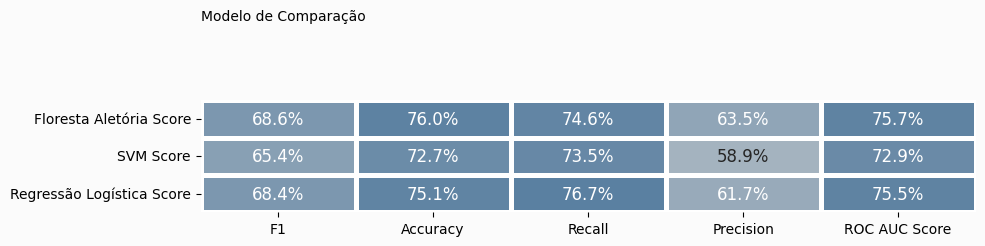

In [ ]:
df_models = round(pd.concat([rf_df,svm_df,lr_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

ax0.text(0,-2.15,'Modelo de Comparação')



plt.show()

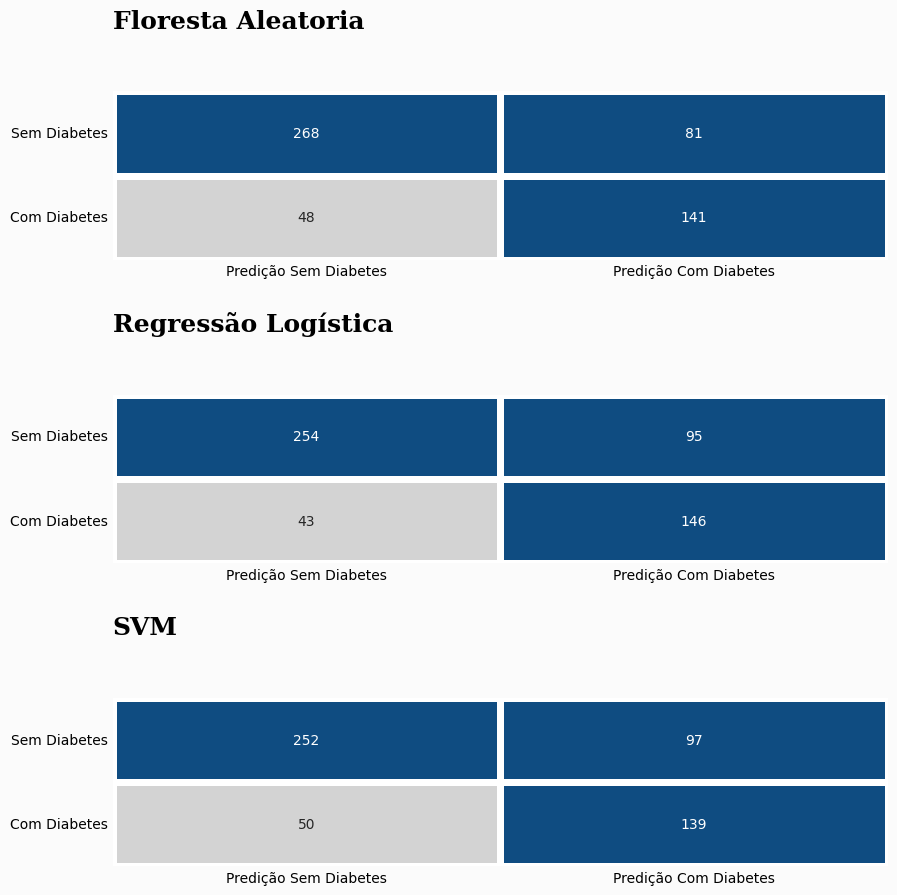

In [ ]:
colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,14))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax0.set_facecolor(background_color)


sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Sem Diabetes','Com Diabetes'],xticklabels=['Predição Sem Diabetes','Predição Com Diabetes'])

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Sem Diabetes','Com Diabetes'],xticklabels=['Predição Sem Diabetes','Predição Com Diabetes'])

sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Sem Diabetes','Com Diabetes'],xticklabels=['Predição Sem Diabetes','Predição Com Diabetes'])



ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)

ax0.text(0,-0.75,'Floresta Aleatoria',fontsize=18,fontweight='bold',fontfamily='serif')


ax1.text(0,-0.75,'Regressão Logística',fontsize=18,fontweight='bold',fontfamily='serif')


ax2.text(0,-0.75,'SVM',fontsize=18,fontweight='bold',fontfamily='serif')



plt.show()